In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In this very first step, we will read the dataset. To read this dataset, we need to use the sklearn library, so let’s import the library. 



In [2]:
# Reading the dataset
from sklearn import datasets

After importing the sklearn.dataset library, let’s load the Boston dataset available in the sklearn library. 



In [3]:
data = datasets.load_boston()


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
df = pd.DataFrame(data.data)

#Providing Feature names
df.columns = data.feature_names

#Providing Target
df_target = np.asarray(data.target)
df["MEDV"] = pd.Series(df_target)


In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.shape

(506, 14)

As we can see in the output, the dataset has 506 records and 14 features.

After reading and understanding the dataset, let’s define the input and output features in the data. The column consisting of the median value of owner-occupied homes (MEDV) will be defined as the output feature, whereas the rest of the Boston house prices features will be defined as the input features. 

We will define the input features as X and the output feature as y.

In [7]:
X = df.copy()
y=X.pop('MEDV')
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

lets check size:

In [9]:
# Checking the shape of input and output features
print('Shape of the input features:', X.shape)
print('Shape of the output features:', y.shape)

Shape of the input features: (506, 13)
Shape of the output features: (506,)


We can see in the output that 13 features of the dataset have been defined as inputs. As we have defined the input and output features, next need to perform feature selection using various methods like filter method, wrapper method and embedded method. 

**Step 2: Feature selection using the Filter method**

**2.1: Chi-Square Test**

First, we will use the Chi-Square method to perform feature selection. The Chi-square test is used for categorical features in the dataset. Now, let’s import the required dependencies to perform the chi-square test. 

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

After importing the required dependencies, let’s convert the data into categorical by changing the type of the data into an integer. 



In [11]:
#Converting data to integer
X1 = X.astype(int)
Y1 = y.astype(int)

By using the SelectKBest model, let’s select the features according to the k highest chi-squared statistic scores.    



In [12]:
#Features with the highest chi-squared statistics
model = SelectKBest(chi2, k=5)
X_new = model.fit_transform(X1,Y1)
print("No. of Features:", X_new.shape) 

No. of Features: (506, 5)


As we can see in the output, the dimension of the features is certainly reduced from 13 to 5 based on the five highest chi-squared statistic scores. 

**2.2: Variance Threshold**

Now, let’s use the variance threshold method to perform feature selection. This approach of feature selection removes all features whose variance does not meet some threshold. Generally, it removes all the zero-variance features, which means all the features that have the same value in all samples. Now, let’s import the required dependencies to perform the variance threshold test. 

In [13]:
from sklearn.feature_selection import VarianceThreshold

After importing the required dependencies, let’s perform feature selection using the variance threshold technique by providing a threshold value. All the features in the dataset with a training-set variance lower than the provided threshold will be removed from the original dataset

In [14]:
#Removing features based on the threshold
model = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))

X_new = model.fit_transform(X)

#Checking the shape of input features after feature selection
print("No. of Features:", X_new.shape)

No. of Features: (506, 11)


So in this part, we are removing all the features with a probability of more than 80% containing zero. As we can see in the output, the dimension of the features is certainly reduced from 13 to 11 features. All the features less than the given threshold have been removed from the given dataset. 

3: Feature selection using the Embedded method

 3.1: Lasso Regularization 

Now, in this particular Embedded method, we will use the Lasso Regularization technique to perform feature selection. Now, let’s import the required dependencies to perform the feature selection using Lasso Regularization. 

In [15]:
#Defining a Lasso model
from sklearn.linear_model import Lasso

Once the required dependencies are been imported, let’s now use the L1 model to perform feature selection, i.e. let’s train the Lasso model using input and output features

In [16]:
# Model building
lasso = Lasso()
lasso = lasso.fit(X, y)

After training the model with L1 prior regularizer (aka Lasso), we will visualise the parameter vectors to understand the importance of the features. 



In [17]:
#Creating a DataFrame
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
lasso_coeff

,Columns,Coefficient Estimate
0,CRIM,-0.063437
1,ZN,0.049165
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,0.949811
6,AGE,0.020910
7,DIS,-0.668790
8,RAD,0.264206
9,TAX,-0.015212


As we can see from the output, three features from the constructed DataFrame have a coefficient value of zero (i.e. CHAS, NOX and INDUS) which means these features are the least important features. Now let’s plot a barplot to understand the importance of each feature in the given dataset using the Lasso regularization method. 

<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

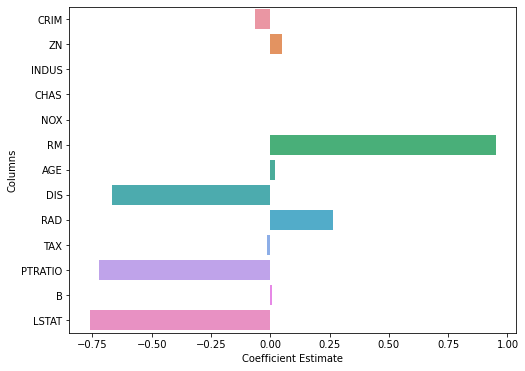

In [18]:
#Visualizing a Barplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.barplot(x='Coefficient Estimate' , y='Columns', data=lasso_coeff)

As per the barplot, the least important features have a coefficient around zero. So can reduce the features by removing the least important features from the dataset. So now, let’s select the relevant features based on the weight importance using the SelectFromModel transformer. 

In [19]:
#Defining SelectFromModel
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(lasso, prefit = True)
new_features = model.transform(X)
#Printing the shape after removing features
new_features.shape

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(506, 10)

As we can see in the output, all the three least important features(CHAS, NOX and INDUS) have been removed from the dataset. So that the dimension of the features is reduced from 13 to 10 features. 

3.2: Based on Feature Importance

The second technique we will implement in the embedded method is feature selection based on feature importance. Now, let’s import the required dependencies to perform the feature selection based on feature importance. 

In [20]:
#Defining a Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor
#Model building
RFR = RandomForestRegressor()
RFR = RFR.fit(X,y)

After training the model with Random Forest Regressor, we will visualise the importance of each feature. 



In [21]:
#Creating a DataFrame
new_X = pd.DataFrame()
new_X["Columns"] = X.columns
new_X['Feature_Importance'] = pd.Series(RFR.feature_importances_)
new_X

,Columns,Feature_Importance
0,CRIM,0.038413
1,ZN,0.000786
2,INDUS,0.005031
3,CHAS,0.000803
4,NOX,0.023261
5,RM,0.448342
6,AGE,0.011187
7,DIS,0.066262
8,RAD,0.004081
9,TAX,0.014224


Now let’s plot a barplot to understand the importance of each feature in the given dataset using this method. 

<AxesSubplot:xlabel='Feature_Importance', ylabel='Columns'>

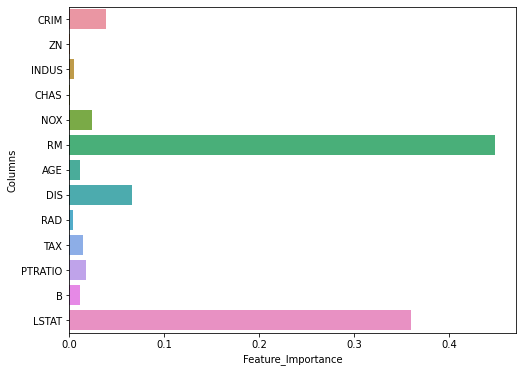

In [22]:
#Visualizing a Barplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.barplot(x='Feature_Importance' , y='Columns', data= new_X)

As per the barplot, the least important features have feature importance close to zero. So we can reduce the features by removing the least important features from the dataset. So now, let’s select the relevant features based on the feature importance using the SelectFromModel transformer. 

In [23]:
#Defining SelectFromModel
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(RFR, prefit = True)
new_features = model.transform(X)
#Printing the shape after removing features
new_features.shape

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(506, 2)

As we can see in the output, the dimension of the features is reduced from 13 to 2 features which indicates that all the features having less importance are removed from the dataset using this method. 

So, this is how we can use feature selection techniques to detect the most relevant features and the least relevant features from the given dataset.